In [117]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import accuracy_score
import pandas as pd

## Load, Aggregate, and Shape Data into Train and Test Sets

In [118]:
### CURRENTLY ONLY FOR THE 2018 SEASON !!! EASY TO EXPAND ###

yCSV = pd.read_csv("Y_data.csv")
xCSV = pd.read_csv("avypro_training_data.csv")

# Match input data to output data by date.
data = pd.merge(xCSV, yCSV, how='inner')
data.fillna(0)
# Separate back into Y and X data.
Y_data = data.iloc[:, 60:74]
X_data = data.iloc[:, 1:60]

In [119]:
Y_data.head()

,size,likelihood,type,atl,ntl,btl,N,NE,E,SE,S,SW,W,NW
0,2,1,1,1,1,1,1,1,1,1,0,0,0,1
1,2,1,2,1,1,1,1,0,0,0,0,0,0,0
2,2,1,1,1,1,1,1,1,1,1,0,0,0,1
3,2,2,1,2,2,2,1,1,1,1,1,0,0,1
4,2,1,1,1,1,1,1,1,1,1,1,1,1,1


In [120]:
X_data.head()

,weasd,air,albedo,lftx4,ccond,cfrzr,cicep,crain,csnow,cape,...,vstm,vwnd,wcinc,wcconv,wcvflx,wcuflx,wvinc,wvconv,wvvflx,wvuflx
0,3.689453,273.513881,22.041667,4.069513,0.001121,0.0,0.0,0.069444,0.194444,2.638889,...,1.761612,3.812396,0.142164,0.269016,27053.009778,52298.722222,0.295112,-0.852878,5.023065e+05,9.125842e+05
1,4.183485,273.840542,22.519445,6.945900,0.001442,0.0,0.0,0.000000,0.027778,0.000000,...,8.467294,4.556467,0.001873,0.099577,12529.501956,18176.009222,0.003210,-0.012544,4.664435e+05,3.961722e+05
2,5.218750,274.311788,26.236112,4.398923,0.001194,0.0,0.0,0.055556,0.069444,0.833333,...,20.272773,5.771789,0.033427,0.495635,50384.602000,29193.199222,0.063256,0.913484,1.029357e+06,4.004341e+05
3,21.324544,271.524231,38.084722,4.569698,0.000942,0.0,0.0,0.111111,0.625000,12.916667,...,-12.230935,2.061167,0.303431,0.181651,-18458.371111,82082.132222,0.644174,0.571547,-2.571857e+05,8.055341e+05
4,26.901476,271.461487,40.956945,7.268658,0.001065,0.0,0.0,0.152778,0.361111,2.638889,...,-25.905458,1.417704,0.022783,0.034756,-106715.221111,95791.171111,-0.002071,-1.273638,-1.669190e+06,1.650360e+06


In [121]:
# Copy the data over to new df.
X_scaled = X_data.copy()
X_scaled = X_scaled.fillna(0)

# Normalize our features.
for column in X_scaled.columns:
    X_scaled[column] = (X_scaled[column] -
                        X_scaled[column].mean()) / X_scaled[column].std()

X_scaled = X_scaled.fillna(0)
X_scaled.head()

,weasd,air,albedo,lftx4,ccond,cfrzr,cicep,crain,csnow,cape,...,vstm,vwnd,wcinc,wcconv,wcvflx,wcuflx,wvinc,wvconv,wvvflx,wvuflx
0,-0.640819,-0.154822,-0.758361,-0.350174,-0.857196,-0.080971,-0.15371,-0.042736,0.215223,-0.109652,...,0.607007,0.672682,0.169894,0.499632,0.266636,0.356793,-0.021850,-1.209588,0.418248,0.513229
1,-0.626863,-0.075757,-0.700934,1.173837,-0.581113,-0.080971,-0.15371,-0.496811,-0.527457,-0.483859,...,1.243171,0.933027,-0.365559,-0.169824,-0.088015,-0.359838,-0.375058,-0.068727,0.366080,-0.298995
2,-0.597619,0.038303,-0.254200,-0.175640,-0.794706,-0.080971,-0.15371,-0.133551,-0.341787,-0.365688,...,2.363150,1.358259,-0.245124,1.395006,0.836374,-0.128460,-0.302402,1.188475,1.184915,-0.292292
3,-0.142659,-0.636395,1.169972,-0.085158,-1.011093,-0.080971,-0.15371,0.229708,2.133812,1.347785,...,-0.720458,0.059940,0.785401,0.154450,-0.844712,0.982292,0.400524,0.724252,-0.686539,0.344858
4,0.014879,-0.651582,1.515206,1.344846,-0.905503,-0.080971,-0.15371,0.502153,0.957903,-0.109652,...,-2.017753,-0.165203,-0.285749,-0.425933,-2.999867,1.270204,-0.381449,-1.780824,-2.740495,1.673619


In [122]:
# Split data into training and testing subsets.
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y_data, test_size=0.30)

## Generate SVM OneVsRest Models

### Size

In [123]:
# Isolate size feature and generate model.
y_size = y_train['size']
size_model = svm.SVC()
size_ovr = OneVsRestClassifier(size_model).fit(X_train, y_size)
size_preds = size_ovr.predict(X_test)
size_preds

array([1, 1, 1, 1, 2, 0, 2, 2, 0, 2, 1, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 0,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 0, 0, 0, 1, 1,
       1, 1, 2, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 0, 1, 1, 1, 2, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 2, 2, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 2, 1, 0, 1,
       0, 1, 2, 1, 2, 1, 1, 2, 1, 1, 0, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 0, 1,
       2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [124]:
# Calculate accuracy with y_test.
size_acc = accuracy_score(y_test['size'], size_preds)
print(size_acc)

0.6091954022988506


### Likelihood

In [125]:
# Isolate likelihood feature and generate model.
y_likelihood = y_train['likelihood']
likelihood_model = svm.SVC()
likelihood_ovr = OneVsRestClassifier(likelihood_model).fit(X_train, y_likelihood)
likelihood_preds = likelihood_ovr.predict(X_test)
likelihood_preds

array([1, 1, 1, 1, 1, 0, 2, 1, 1, 3, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 0,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 2, 1, 0, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 0, 1, 1, 1, 2, 1, 1, 1, 3, 1, 1, 3, 1, 3, 2, 1, 3, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1],
      dtype=int64)

In [126]:
# Calculate accuracy with y_test.
likelihood_acc = accuracy_score(y_test['likelihood'], likelihood_preds)
print(likelihood_acc)

0.632183908045977


### Problem Type

In [127]:
# Isolate problem type feature and generate model.
y_type = y_train['type']
type_model = svm.SVC()
type_ovr = OneVsRestClassifier(type_model).fit(X_train, y_type)
type_preds = type_ovr.predict(X_test)
type_preds

array([3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 1, 1, 1, 0, 1, 3, 3, 3, 3, 3,
       1, 1, 1, 1, 3, 3, 1, 1, 1, 3, 3, 1, 1, 1, 1, 3, 1, 1, 0, 1, 1, 3,
       1, 3, 1, 1, 3, 1, 3, 1, 3, 1, 1, 1, 3, 3, 1, 3, 3, 1, 3, 1, 1, 3,
       1, 1, 1, 3, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1, 3, 1, 3,
       1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3,
       0, 3, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 3, 3, 3, 1, 1, 1,
       1, 0, 1, 1, 1, 3, 1, 3, 0, 3, 1, 1, 1, 1, 1, 3, 1, 3, 1, 3],
      dtype=int64)

In [128]:
# Calculate accuracy with y_test.
type_acc = accuracy_score(y_test['type'], type_preds)
print(type_acc)

0.7183908045977011


### Above Treeline Risk

In [129]:
# Isolate atl feature and generate model.
y_atl = y_train['atl']
atl_model = svm.SVC()
atl_ovr = OneVsRestClassifier(atl_model).fit(X_train, y_atl)
atl_preds = atl_ovr.predict(X_test)
atl_preds

array([1, 1, 1, 1, 1, 0, 2, 1, 1, 3, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 0,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 2, 0, 0, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 1, 1, 1, 1, 2, 1, 1, 1, 3, 1, 1, 3, 1, 3, 1, 1, 3, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1],
      dtype=int64)

In [130]:
# Calculate accuracy with y_test.
atl_acc = accuracy_score(y_test['atl'], atl_preds)
print(atl_acc)

0.6839080459770115


### Near Treeline Risk

In [131]:
# Isolate ntl feature and generate model.
y_ntl = y_train['ntl']
ntl_model = svm.SVC()
ntl_ovr = OneVsRestClassifier(ntl_model).fit(X_train, y_ntl)
ntl_preds = ntl_ovr.predict(X_test)
ntl_preds

array([1, 1, 1, 1, 1, 0, 2, 1, 1, 3, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 0,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 2, 1, 0, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 3, 1, 1, 1, 1, 2, 1, 1, 1, 3, 1, 1, 3, 1, 3, 1, 1, 3, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1],
      dtype=int64)

In [132]:
# Calculate accuracy with y_test.
ntl_acc = accuracy_score(y_test['ntl'], ntl_preds)
print(ntl_acc)

0.6781609195402298


### Below Treeline Risk

In [133]:
# Isolate atl feature and generate model.
y_btl = y_train['btl']
btl_model = svm.SVC()
btl_ovr = OneVsRestClassifier(btl_model).fit(X_train, y_btl)
btl_preds = btl_ovr.predict(X_test)
btl_preds

array([1, 0, 0, 1, 1, 0, 2, 1, 0, 3, 1, 0, 2, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 3, 1, 1, 1, 0, 0, 3, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 2, 0, 0, 1, 1, 3, 1, 0, 0, 3, 1, 1, 3, 2, 2, 1, 0, 3, 2, 1,
       0, 0, 1, 3, 0, 0, 1, 0, 2, 1, 0, 1, 1, 2, 1, 0, 1, 1, 1, 1, 0, 0,
       2, 0, 3, 1, 1, 1, 1, 0, 0, 1, 0, 1, 3, 1, 0, 1, 2, 0, 0, 1],
      dtype=int64)

In [134]:
# Calculate accuracy with y_test.
btl_acc = accuracy_score(y_test['btl'], btl_preds)
print(btl_acc)

0.6494252873563219


### Aspect

In [135]:
y_train.head()

,size,likelihood,type,atl,ntl,btl,N,NE,E,SE,S,SW,W,NW
350,2,1,1,1,1,1,1,1,1,1,1,0,0,1
228,1,1,4,1,2,2,1,1,0,0,0,0,0,1
522,1,0,0,0,0,0,1,1,1,1,1,1,1,1
311,2,3,1,3,3,3,1,1,1,1,0,0,0,1
195,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [136]:
aspect = ['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW']

In [137]:
# Format test set.
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
y_train_asp = y_train.iloc[:, 6:14]
y_test_asp = y_test.iloc[:, 6:14]

for feature in aspect:
    model = svm.SVC()
    model.fit(X_train, y_train_asp[feature])
    preds = model.predict(X_test)
    score = accuracy_score(y_test[feature], preds)
    print(feature + ": ", score)
    print('Precision: %.3f' % precision_score(y_test[feature].to_numpy(), preds,average='micro'))
    # recall
    print('Recall: %.3f' % recall_score(y_test[feature].to_numpy(), preds, average='micro'))
    # f1
    print('F1 Score: %.3f' % f1_score(y_test[feature].to_numpy(), preds, average='micro'))

N:  0.9137931034482759
Precision: 0.914
Recall: 0.914
F1 Score: 0.914
NE:  0.8793103448275862
Precision: 0.879
Recall: 0.879
F1 Score: 0.879
E:  0.9022988505747126
Precision: 0.902
Recall: 0.902
F1 Score: 0.902
SE:  0.8850574712643678
Precision: 0.885
Recall: 0.885
F1 Score: 0.885
S:  0.7931034482758621
Precision: 0.793
Recall: 0.793
F1 Score: 0.793
SW:  0.8160919540229885
Precision: 0.816
Recall: 0.816
F1 Score: 0.816
W:  0.7586206896551724
Precision: 0.759
Recall: 0.759
F1 Score: 0.759
NW:  0.9252873563218391
Precision: 0.925
Recall: 0.925
F1 Score: 0.925


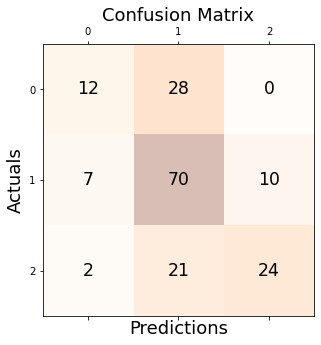

In [138]:
## calculating precision matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
conf_matrix_size = confusion_matrix(y_true=y_test['size'], y_pred=size_preds)
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix_size, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix_size.shape[0]):
    for j in range(conf_matrix_size.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix_size[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [139]:
## calculating precision, recall and f1
# precision
print("Size")
print('Precision: %.3f' % precision_score(y_test['size'].to_numpy(), size_preds,average='micro'))
# recall
print('Recall: %.3f' % recall_score(y_test['size'].to_numpy(), size_preds, average='micro'))
# f1
print('F1 Score: %.3f' % f1_score(y_test['size'].to_numpy(), size_preds, average='micro'))

Size
Precision: 0.609
Recall: 0.609
F1 Score: 0.609


Likelehood
Precision: 0.632
Recall: 0.632
F1 Score: 0.632


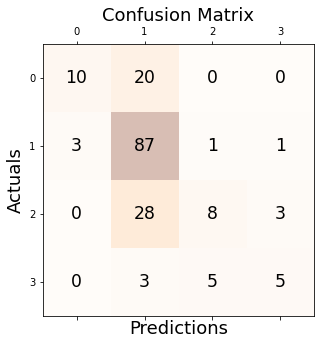

In [140]:
conf_matrix = confusion_matrix(y_true=y_test['likelihood'], y_pred=likelihood_preds)

# print precision recall and f1
print("Likelehood")
print('Precision: %.3f' % precision_score(y_test['likelihood'].to_numpy(), likelihood_preds,average='micro'))
# recall
print('Recall: %.3f' % recall_score(y_test['likelihood'].to_numpy(), likelihood_preds, average='micro'))
# f1
print('F1 Score: %.3f' % f1_score(y_test['likelihood'].to_numpy(), likelihood_preds, average='micro'))
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

Problem Type
Precision: 0.718
Recall: 0.718
F1 Score: 0.718


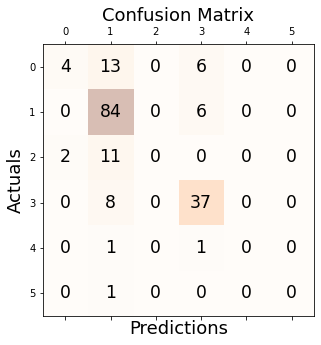

In [141]:
## PROBLEM TYPE ##
conf_matrix = confusion_matrix(y_true=y_test['type'], y_pred=type_preds)

# print precision recall and f1
print("Problem Type")
print('Precision: %.3f' % precision_score(y_test['type'].to_numpy(), type_preds,average='micro'))
# recall
print('Recall: %.3f' % recall_score(y_test['type'].to_numpy(), type_preds, average='micro'))
# f1
print('F1 Score: %.3f' % f1_score(y_test['type'].to_numpy(), type_preds, average='micro'))
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

Above Tree Line
Precision: 0.684
Recall: 0.684
F1 Score: 0.684


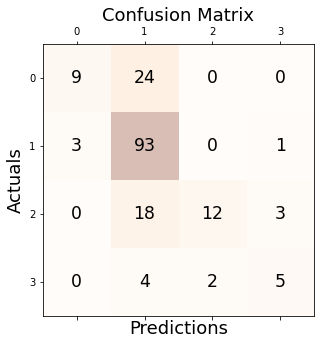

In [142]:
### Above Treeline ###
conf_matrix = confusion_matrix(y_true=y_test['atl'], y_pred=atl_preds)

# print precision recall and f1
print("Above Tree Line")
print('Precision: %.3f' % precision_score(y_test['atl'].to_numpy(),atl_preds,average='micro'))
# recall
print('Recall: %.3f' % recall_score(y_test['atl'].to_numpy(), atl_preds, average='micro'))
# f1
print('F1 Score: %.3f' % f1_score(y_test['atl'].to_numpy(), atl_preds, average='micro'))
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

Near Tree Line
Precision: 0.678
Recall: 0.678
F1 Score: 0.678


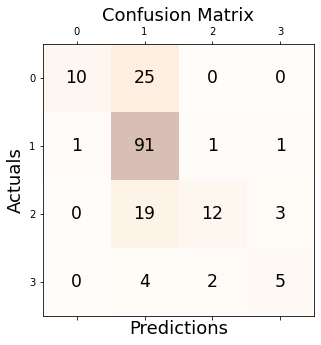

In [143]:

### Near Treeline ###
conf_matrix = confusion_matrix(y_true=y_test['ntl'], y_pred=ntl_preds)

# print precision recall and f1
print("Near Tree Line")
print('Precision: %.3f' % precision_score(y_test['ntl'].to_numpy(), ntl_preds, average='micro'))
# recall
print('Recall: %.3f' % recall_score(y_test['ntl'].to_numpy(), ntl_preds, average='micro'))
# f1
print('F1 Score: %.3f' % f1_score(y_test['ntl'].to_numpy(), ntl_preds, average='micro'))
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

Below Tree Line
Precision: 0.649
Recall: 0.649
F1 Score: 0.649


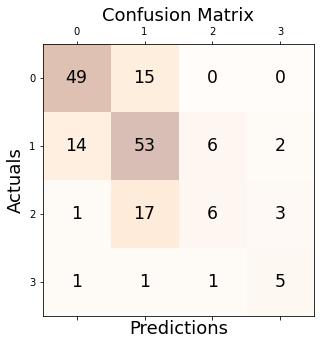

In [144]:
### Below Treeline ###
conf_matrix = confusion_matrix(y_true=y_test['btl'], y_pred=btl_preds)

# print precision recall and f1
print("Below Tree Line")
print('Precision: %.3f' % precision_score(y_test['btl'].to_numpy(), btl_preds, average='micro'))
# recall
print('Recall: %.3f' % recall_score(y_test['btl'].to_numpy(), btl_preds, average='micro'))
# f1
print('F1 Score: %.3f' % f1_score(y_test['btl'].to_numpy(), btl_preds, average='micro'))
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [149]:
X_temp = pd.DataFrame(X_data)
print(X_temp.head())

       weasd         air     albedo     lftx4     ccond  cfrzr  cicep  \
0   3.689453  273.513881  22.041667  4.069513  0.001121    0.0    0.0   
1   4.183485  273.840542  22.519445  6.945900  0.001442    0.0    0.0   
2   5.218750  274.311788  26.236112  4.398923  0.001194    0.0    0.0   
3  21.324544  271.524231  38.084722  4.569698  0.000942    0.0    0.0   
4  26.901476  271.461487  40.956945  7.268658  0.001065    0.0    0.0   

      crain     csnow       cape  ...       vstm      vwnd     wcinc  \
0  0.069444  0.194444   2.638889  ...   1.761612  3.812396  0.142164   
1  0.000000  0.027778   0.000000  ...   8.467294  4.556467  0.001873   
2  0.055556  0.069444   0.833333  ...  20.272773  5.771789  0.033427   
3  0.111111  0.625000  12.916667  ... -12.230935  2.061167  0.303431   
4  0.152778  0.361111   2.638889  ... -25.905458  1.417704  0.022783   

     wcconv         wcvflx        wcuflx     wvinc    wvconv        wvvflx  \
0  0.269016   27053.009778  52298.722222  0.295112

In [157]:
X_temp2 = X_temp.drop('weasd', axis=1)



In [158]:
print(X_temp2.head())

          air     albedo     lftx4     ccond  cfrzr  cicep     crain  \
0  273.513881  22.041667  4.069513  0.001121    0.0    0.0  0.069444   
1  273.840542  22.519445  6.945900  0.001442    0.0    0.0  0.000000   
2  274.311788  26.236112  4.398923  0.001194    0.0    0.0  0.055556   
3  271.524231  38.084722  4.569698  0.000942    0.0    0.0  0.111111   
4  271.461487  40.956945  7.268658  0.001065    0.0    0.0  0.152778   

      csnow       cape      cdcon  ...       vstm      vwnd     wcinc  \
0  0.194444   2.638889   2.236111  ...   1.761612  3.812396  0.142164   
1  0.027778   0.000000   0.000000  ...   8.467294  4.556467  0.001873   
2  0.069444   0.833333   0.000000  ...  20.272773  5.771789  0.033427   
3  0.625000  12.916667  18.375000  ... -12.230935  2.061167  0.303431   
4  0.361111   2.638889   0.000000  ... -25.905458  1.417704  0.022783   

     wcconv         wcvflx        wcuflx     wvinc    wvconv        wvvflx  \
0  0.269016   27053.009778  52298.722222  0.295112

Determining Feature Importance

In [160]:
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y_data, test_size=0.30)
# y_size = y_train['size']
# size_model = svm.SVC()
# size_ovr = OneVsRestClassifier(size_model).fit(X_train, y_size)
# size_preds = size_ovr.predict(X_test)
# size_preds
featureImportance = []

print("Analyzing feature importance per output")

# iterate through outputs
for colY in Y_data[1:]:
    print(colY, " output: \n")
    #append output name to list
    # dictionary for storage of results
    tempDict = {}

    # iterate through all inputs removing one feature at a time
    for colX in X_scaled.columns[1:]:
        print(colX, " feature removed:")

        # drop feature and create new train/test set
        X_temp = X_data.drop(colX, axis=1)
        X_train, X_test, y_train, y_test = train_test_split(X_temp, Y_data[colY], test_size=0.30)

        # model using SVM
        model = svm.SVC()
        ovr = OneVsRestClassifier(model).fit(X_train, y_train)
        predict = ovr.predict(X_test)
        acc = accuracy_score(y_test, preds)
        print("Accuracy: ", acc)
        tempDict[colX] = acc

    featureImportance.append(tempDict)

print(featureImportance)



Analyzing feature importance per output
size  output: 

air  feature removed:
Accuracy:  0.5172413793103449
albedo  feature removed:
Accuracy:  0.5229885057471264
lftx4  feature removed:
Accuracy:  0.5287356321839081
ccond  feature removed:
Accuracy:  0.5862068965517241
cfrzr  feature removed:
Accuracy:  0.5459770114942529
cicep  feature removed:
Accuracy:  0.5172413793103449
crain  feature removed:
Accuracy:  0.5
csnow  feature removed:
Accuracy:  0.5229885057471264
cape  feature removed:
Accuracy:  0.5517241379310345
cdcon  feature removed:
Accuracy:  0.5
acpcp  feature removed:
Accuracy:  0.5287356321839081
dpt  feature removed:
Accuracy:  0.5344827586206896
dlwrf  feature removed:
Accuracy:  0.5344827586206896
dswrf  feature removed:
Accuracy:  0.47126436781609193
evap  feature removed:
Accuracy:  0.5229885057471264
hgt  feature removed:
Accuracy:  0.5287356321839081
gflux  feature removed:
Accuracy:  0.5804597701149425
hcdc  feature removed:
Accuracy:  0.5172413793103449
mconv  fe

In [161]:
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y_data, test_size=0.30)
# y_size = y_train['size']
# size_model = svm.SVC()
# size_ovr = OneVsRestClassifier(size_model).fit(X_train, y_size)
# size_preds = size_ovr.predict(X_test)
# size_preds
featureImportance = []

print("Analyzing feature importance per output")

# iterate through outputs
for colY in Y_data[1:]:
    print(colY, " output: \n")
    #append output name to list
    # dictionary for storage of results
    tempDict = {}

    # iterate through all inputs removing one feature at a time
    for colX in X_scaled.columns[1:]:
        print(colX, " feature removed:")

        # drop feature and create new train/test set
        X_temp = X_data.drop(colX, axis=1)
        X_train, X_test, y_train, y_test = train_test_split(X_temp, Y_data[colY], test_size=0.30)

        # model using SVM
        model = svm.SVC()
        ovr = OneVsRestClassifier(model).fit(X_train, y_train)
        predict = ovr.predict(X_test)
        acc = accuracy_score(y_test, preds)
        print("Accuracy: ", acc)
        tempDict[colX] = acc

    featureImportance.append(tempDict)

print(featureImportance)



Analyzing feature importance per output
size  output: 

air  feature removed:
Accuracy:  0.5517241379310345
albedo  feature removed:
Accuracy:  0.5
lftx4  feature removed:
Accuracy:  0.5287356321839081
ccond  feature removed:
Accuracy:  0.5517241379310345
cfrzr  feature removed:
Accuracy:  0.5689655172413793
cicep  feature removed:
Accuracy:  0.5172413793103449
crain  feature removed:
Accuracy:  0.4885057471264368
csnow  feature removed:
Accuracy:  0.5574712643678161
cape  feature removed:
Accuracy:  0.5114942528735632
cdcon  feature removed:
Accuracy:  0.5172413793103449
acpcp  feature removed:
Accuracy:  0.46551724137931033
dpt  feature removed:
Accuracy:  0.4942528735632184
dlwrf  feature removed:
Accuracy:  0.5862068965517241
dswrf  feature removed:
Accuracy:  0.5344827586206896
evap  feature removed:
Accuracy:  0.5459770114942529
hgt  feature removed:
Accuracy:  0.5229885057471264
gflux  feature removed:
Accuracy:  0.5574712643678161
hcdc  feature removed:
Accuracy:  0.55172413793

In [163]:
print(featureImportance)

[{'air': 0.5517241379310345, 'albedo': 0.5, 'lftx4': 0.5287356321839081, 'ccond': 0.5517241379310345, 'cfrzr': 0.5689655172413793, 'cicep': 0.5172413793103449, 'crain': 0.4885057471264368, 'csnow': 0.5574712643678161, 'cape': 0.5114942528735632, 'cdcon': 0.5172413793103449, 'acpcp': 0.46551724137931033, 'dpt': 0.4942528735632184, 'dlwrf': 0.5862068965517241, 'dswrf': 0.5344827586206896, 'evap': 0.5459770114942529, 'hgt': 0.5229885057471264, 'gflux': 0.5574712643678161, 'hcdc': 0.5517241379310345, 'mconv': 0.47701149425287354, 'lhtfl': 0.5114942528735632, 'lcdc': 0.5229885057471264, 'prmsl': 0.5574712643678161, 'mcdc': 0.5632183908045977, 'mstav': 0.5, 'cdlyr': 0.5172413793103449, 'cnwat': 0.5574712643678161, 'pottmp': 0.4827586206896552, 'pr_wtr': 0.4942528735632184, 'apcp': 0.5747126436781609, 'prate': 0.5459770114942529, 'pres': 0.5574712643678161, 'vvel': 0.5689655172413793, 'rhum': 0.5287356321839081, 'shtfl': 0.5, 'snohf': 0.5287356321839081, 'snowc': 0.5229885057471264, 'snod': 0

In [167]:
# convert each dictionary to dataframe to merge all into 1
i = 0
df = pd.DataFrame(featureImportance)
print(df)


         air    albedo     lftx4     ccond     cfrzr     cicep     crain  \
0   0.551724  0.500000  0.528736  0.551724  0.568966  0.517241  0.488506   
1   0.494253  0.568966  0.574713  0.603448  0.545977  0.545977  0.551724   
2   0.540230  0.511494  0.545977  0.465517  0.540230  0.477011  0.540230   
3   0.534483  0.568966  0.528736  0.586207  0.557471  0.551724  0.540230   
4   0.568966  0.522989  0.534483  0.597701  0.534483  0.545977  0.551724   
5   0.442529  0.442529  0.408046  0.442529  0.465517  0.448276  0.459770   
6   0.942529  0.908046  0.925287  0.919540  0.908046  0.902299  0.925287   
7   0.890805  0.896552  0.867816  0.856322  0.885057  0.873563  0.873563   
8   0.885057  0.890805  0.862069  0.913793  0.890805  0.908046  0.919540   
9   0.862069  0.890805  0.890805  0.890805  0.867816  0.890805  0.908046   
10  0.620690  0.591954  0.586207  0.563218  0.597701  0.614943  0.545977   
11  0.522989  0.442529  0.471264  0.528736  0.534483  0.528736  0.482759   
12  0.563218

In [168]:
df_trans = df.T
print(df_trans)

              0         1         2         3         4         5         6   \
air     0.551724  0.494253  0.540230  0.534483  0.568966  0.442529  0.942529   
albedo  0.500000  0.568966  0.511494  0.568966  0.522989  0.442529  0.908046   
lftx4   0.528736  0.574713  0.545977  0.528736  0.534483  0.408046  0.925287   
ccond   0.551724  0.603448  0.465517  0.586207  0.597701  0.442529  0.919540   
cfrzr   0.568966  0.545977  0.540230  0.557471  0.534483  0.465517  0.908046   
cicep   0.517241  0.545977  0.477011  0.551724  0.545977  0.448276  0.902299   
crain   0.488506  0.551724  0.540230  0.540230  0.551724  0.459770  0.925287   
csnow   0.557471  0.471264  0.591954  0.545977  0.534483  0.413793  0.925287   
cape    0.511494  0.545977  0.580460  0.586207  0.563218  0.482759  0.931034   
cdcon   0.517241  0.522989  0.534483  0.620690  0.597701  0.436782  0.942529   
acpcp   0.465517  0.557471  0.517241  0.551724  0.528736  0.431034  0.919540   
dpt     0.494253  0.557471  0.540230  0.

In [169]:
df_trans.columns = Y_data.columns
print(df_trans.columns)

Index(['size', 'likelihood', 'type', 'atl', 'ntl', 'btl', 'N', 'NE', 'E', 'SE',
       'S', 'SW', 'W', 'NW'],
      dtype='object')


In [170]:
print(df_trans.head())

            size  likelihood      type       atl       ntl       btl  \
air     0.551724    0.494253  0.540230  0.534483  0.568966  0.442529   
albedo  0.500000    0.568966  0.511494  0.568966  0.522989  0.442529   
lftx4   0.528736    0.574713  0.545977  0.528736  0.534483  0.408046   
ccond   0.551724    0.603448  0.465517  0.586207  0.597701  0.442529   
cfrzr   0.568966    0.545977  0.540230  0.557471  0.534483  0.465517   

               N        NE         E        SE         S        SW         W  \
air     0.942529  0.890805  0.885057  0.862069  0.620690  0.522989  0.563218   
albedo  0.908046  0.896552  0.890805  0.890805  0.591954  0.442529  0.551724   
lftx4   0.925287  0.867816  0.862069  0.890805  0.586207  0.471264  0.505747   
ccond   0.919540  0.856322  0.913793  0.890805  0.563218  0.528736  0.557471   
cfrzr   0.908046  0.885057  0.890805  0.867816  0.597701  0.534483  0.545977   

              NW  
air     0.908046  
albedo  0.925287  
lftx4   0.925287  
ccond   0.

In [171]:
df_trans.to_csv("featureImportance.csv")

In [173]:
min_val_series = df_trans.min()
max_val_series = df_trans.max()
print(min_val_series)
print(max_val_series)

size          0.454023
likelihood    0.471264
type          0.448276
atl           0.471264
ntl           0.488506
btl           0.396552
N             0.873563
NE            0.850575
E             0.833333
SE            0.833333
S             0.511494
SW            0.442529
W             0.494253
NW            0.879310
dtype: float64
size          0.591954
likelihood    0.614943
type          0.591954
atl           0.660920
ntl           0.666667
btl           0.522989
N             0.942529
NE            0.936782
E             0.931034
SE            0.931034
S             0.655172
SW            0.597701
W             0.643678
NW            0.959770
dtype: float64


In [175]:
minvalueIndexLabel = df_trans.idxmin()
maxvalueIndexLabel = df_trans.idxmax()
print("Most Important Features per Output")
print(minvalueIndexLabel)
print("Least Important Features per Output")
print(maxvalueIndexLabel)

Most Important Features per Output
size            ustm
likelihood     csnow
type           gflux
atl             apcp
ntl             vwsh
btl           wcvflx
N              prmsl
NE              tcdc
E              cnwat
SE              mcdc
S             wcvflx
SW            albedo
W              snowc
NW              rhum
dtype: object
Least Important Features per Output
size            tcdc
likelihood    wvuflx
type           csnow
atl             ustm
ntl             hlcy
btl            uswrf
N                air
NE              vvel
E                hgt
SE             wcinc
S                tke
SW              mcdc
W               vvel
NW              vvel
dtype: object


In [176]:
print(df.columns)

Index(['air', 'albedo', 'lftx4', 'ccond', 'cfrzr', 'cicep', 'crain', 'csnow',
       'cape', 'cdcon', 'acpcp', 'dpt', 'dlwrf', 'dswrf', 'evap', 'hgt',
       'gflux', 'hcdc', 'mconv', 'lhtfl', 'lcdc', 'prmsl', 'mcdc', 'mstav',
       'cdlyr', 'cnwat', 'pottmp', 'pr_wtr', 'apcp', 'prate', 'pres', 'vvel',
       'rhum', 'shtfl', 'snohf', 'snowc', 'snod', 'y', 'shum', 'hlcy', 'rct',
       'tcdc', 'tke', 'ulwrf', 'uswrf', 'ustm', 'uwnd', 'vwsh', 'vstm', 'vwnd',
       'wcinc', 'wcconv', 'wcvflx', 'wcuflx', 'wvinc', 'wvconv', 'wvvflx',
       'wvuflx'],
      dtype='object')
